# Eastward wind dataframe generation

In [3]:
import pandas as pd
import numpy as np


In [ ]:
# lat= pd.read_csv('latitude.csv')
# lat.head()
# lon= pd.read_csv('lon.csv')
# lon.head()

In [18]:
df= pd.read_csv('1978_2021.csv')
df=df[df['u']!='--']
df.head()

,time,lon,lat,v,u
0,692496,3.00,44.0,-0.48332291460866017,-0.045245268081004486
1,692496,3.25,44.0,-1.482495601695324,0.6428072077634288
2,692496,3.50,44.0,-2.1210453820945654,1.1167519212436703
3,692496,3.75,44.0,-2.394141216079288,1.4429358456355377
4,692496,4.00,44.0,-2.7007701493462135,0.6451861829008086


In [20]:
df.v=df.v.astype(float)
df.u=df.u.astype(float)
df

,time,lon,lat,v,u
0,692496,3.00,44.0,-0.483323,-0.045245
1,692496,3.25,44.0,-1.482496,0.642807
2,692496,3.50,44.0,-2.121045,1.116752
3,692496,3.75,44.0,-2.394141,1.442936
4,692496,4.00,44.0,-2.700770,0.645186
...,...,...,...,...,...
96763,1065768,7.00,42.0,-2.234717,4.543005
96764,1065768,7.25,42.0,-1.936613,4.345814
96765,1065768,7.50,42.0,-1.668064,3.992140
96766,1065768,7.75,42.0,-1.487611,3.691332


In [21]:
df['wspeed'] = np.sqrt(df['v'].pow(2) + df['u'].pow(2))
df.head()


,time,lon,lat,v,u,wspeed
0,692496,3.00,44.0,-0.483323,-0.045245,0.485436
1,692496,3.25,44.0,-1.482496,0.642807,1.615857
2,692496,3.50,44.0,-2.121045,1.116752,2.397075
3,692496,3.75,44.0,-2.394141,1.442936,2.795349
4,692496,4.00,44.0,-2.700770,0.645186,2.776765


In [25]:
df.wspeed.max()

15.161861796967168

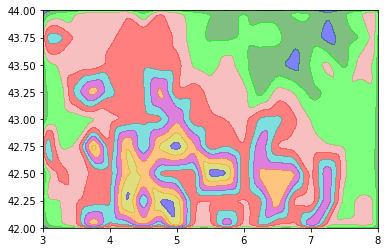

In [27]:
import branca
import folium as folium
from folium import plugins
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import geojsoncontour
import scipy as sp
import scipy.ndimage

 
# Setup colormap
colors = ['b','g','lime','lightcoral','r','c','m','darkorange','y']#['#d7191c',  '#fdae61',  '#ffffbf',  '#abdda4',  '#2b83ba']
vmin   = 0 #temp_mean - 2 * temp_std
vmax   = 16 #temp_mean + 2 * temp_std
levels = len(colors)
cm     = branca.colormap.LinearColormap(colors, vmin=vmin, vmax=vmax).to_step(levels)
 
# Create a dataframe with fake data
# df = pd.DataFrame({
#     'longitude':   np.random.normal(11.84,     0.15,     1000),
#     'latitude':    np.random.normal(55.55,     0.15,     1000),
#     'temperature': np.random.normal(temp_mean, temp_std, 1000)})
 
# The original data
x_orig = np.asarray(df.lon.tolist())
y_orig = np.asarray(df.lat.tolist())
z_orig = np.asarray(df.wspeed.tolist())
 
# Make a grid
x_arr          = np.linspace(np.min(x_orig), np.max(x_orig), 500)
y_arr          = np.linspace(np.min(y_orig), np.max(y_orig), 500)
x_mesh, y_mesh = np.meshgrid(x_arr, y_arr)
 
# Grid the values
z_mesh = griddata((x_orig, y_orig), z_orig, (x_mesh, y_mesh), method='linear')
 
# Gaussian filter the grid to make it smoother
sigma = [5, 5]
z_mesh = sp.ndimage.filters.gaussian_filter(z_mesh, sigma, mode='constant')
 
# Create the contour
contourf = plt.contourf(x_mesh, y_mesh, z_mesh, levels, alpha=0.5, colors=colors, linestyles='None', vmin=vmin, vmax=vmax)
 
# Convert matplotlib contourf to geojson
geojson = geojsoncontour.contourf_to_geojson(
    contourf=contourf,
    min_angle_deg=3.0,
    ndigits=5,
    stroke_width=1,
    fill_opacity=0.5)
 
# Set up the folium plot
geomap = folium.Map([df.lat.mean(), df.lon.mean()], zoom_start=8, tiles="cartodbpositron")
 
# Plot the contour plot on folium
folium.GeoJson(
    geojson,
    style_function=lambda x: {
        'color':     x['properties']['stroke'],
        'weight':    x['properties']['stroke-width'],
        'fillColor': x['properties']['fill'],
        'opacity':   0.6,
    }).add_to(geomap)
 
# Add the colormap to the folium map
cm.caption = 'Wind speed'
geomap.add_child(cm)
 
# Fullscreen mode
plugins.Fullscreen(position='topright', force_separate_button=True).add_to(geomap)
 
# Plot the data
geomap

Number of sets

In [31]:
numberofsets=df.time.unique()
print(len(numberofsets))


512


Therefore there are 96768 rows divided by 512 time sets, each set has 189 readings

In [42]:
df

,time,lon,lat,v,u,wspeed
0,692496,3.00,44.0,-0.483323,-0.045245,0.485436
1,692496,3.25,44.0,-1.482496,0.642807,1.615857
2,692496,3.50,44.0,-2.121045,1.116752,2.397075
3,692496,3.75,44.0,-2.394141,1.442936,2.795349
4,692496,4.00,44.0,-2.700770,0.645186,2.776765
...,...,...,...,...,...,...
96763,1065768,7.00,42.0,-2.234717,4.543005,5.062890
96764,1065768,7.25,42.0,-1.936613,4.345814,4.757791
96765,1065768,7.50,42.0,-1.668064,3.992140,4.326618
96766,1065768,7.75,42.0,-1.487611,3.691332,3.979814


In [47]:
df1=df[['lon','lat','wspeed']]
df1=df1.head(189)

In [48]:
df1

,lon,lat,wspeed
0,3.00,44.0,0.485436
1,3.25,44.0,1.615857
2,3.50,44.0,2.397075
3,3.75,44.0,2.795349
4,4.00,44.0,2.776765
...,...,...,...
184,7.00,42.0,2.681294
185,7.25,42.0,2.633086
186,7.50,42.0,2.666298
187,7.75,42.0,2.674724


In [49]:
for i in range (1,512):
    for j in range (0,189):
        df1.wspeed[j]=df.wspeed[j+189*i]+df1.wspeed[j]
df1

,lon,lat,wspeed
0,3.00,44.0,1140.722464
1,3.25,44.0,1318.123974
2,3.50,44.0,1325.423674
3,3.75,44.0,1147.210713
4,4.00,44.0,1093.660683
...,...,...,...
184,7.00,42.0,1851.979929
185,7.25,42.0,1738.767844
186,7.50,42.0,1615.554307
187,7.75,42.0,1498.057202


In [50]:
df1.wspeed=df1.wspeed.div(100)
df1

,lon,lat,wspeed
0,3.00,44.0,11.407225
1,3.25,44.0,13.181240
2,3.50,44.0,13.254237
3,3.75,44.0,11.472107
4,4.00,44.0,10.936607
...,...,...,...
184,7.00,42.0,18.519799
185,7.25,42.0,17.387678
186,7.50,42.0,16.155543
187,7.75,42.0,14.980572


In [79]:
z_orig

array([11.40722464, 13.18123974, 13.25423674, 11.47210713, 10.93660683,
       12.70876627, 16.06248298, 16.39466824, 14.40492127, 10.46626183,
        9.21858471,  8.16207299,  7.11085669,  6.21533655,  5.61018132,
        5.6261216 ,  4.26537187,  3.86706643,  4.0300353 ,  5.20815399,
        7.33229887, 14.10961629, 14.70168518, 14.38627477, 11.69718652,
       11.96808597, 13.54915209, 16.08966698, 15.59404162, 13.75685201,
       10.83252106,  9.31513277,  8.4432945 ,  8.33516138,  7.81381187,
        6.94561632,  5.17223894,  3.6212667 ,  3.64709875,  4.94893927,
        6.50735151,  8.33310506, 15.2469448 , 14.99117919, 14.00853114,
       12.50107017, 13.41256358, 15.2276199 , 17.4454002 , 16.76407409,
       15.07479429, 12.47894643, 10.70746687,  9.43848943,  9.02531901,
        8.60531928,  7.83934347,  6.75936349,  6.25972063,  6.99627706,
        8.14611709,  9.17281623,  9.85822254, 16.91981256, 16.47495546,
       15.76775969, 16.09017411, 16.72136986, 18.34330548, 19.69

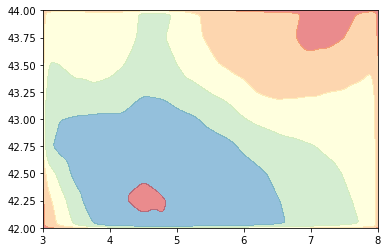

In [89]:
colors =  ['#d7191c',  '#fdae61',  '#ffffbf',  '#abdda4',  '#2b83ba']#['b','g','lime','lightcoral','r','c','m','darkorange','y']
vmin   = 0 #temp_mean - 2 * temp_std
vmax   = 25 #temp_mean + 2 * temp_std
levels = len(colors)
cm     = branca.colormap.LinearColormap(colors, vmin=vmin, vmax=vmax).to_step(levels)
 
# Create a dataframe with fake data
# df = pd.DataFrame({
#     'longitude':   np.random.normal(11.84,     0.15,     1000),
#     'latitude':    np.random.normal(55.55,     0.15,     1000),
#     'temperature': np.random.normal(temp_mean, temp_std, 1000)})
 
# The original data
x_orig = np.asarray(df1.lon.tolist())
y_orig = np.asarray(df1.lat.tolist())
z_orig = np.asarray(df1.wspeed.tolist())
 
# Make a grid
x_arr          = np.linspace(np.min(x_orig), np.max(x_orig), 500)
y_arr          = np.linspace(np.min(y_orig), np.max(y_orig), 500)
x_mesh, y_mesh = np.meshgrid(x_arr, y_arr)
 
# Grid the values
z_mesh = griddata((x_orig, y_orig), z_orig, (x_mesh, y_mesh), method='linear')
 
# Gaussian filter the grid to make it smoother
sigma = [5, 5]
z_mesh = sp.ndimage.filters.gaussian_filter(z_mesh, sigma, mode='constant')
 
# Create the contour
contourf = plt.contourf(x_mesh, y_mesh, z_mesh, levels-1, alpha=0.5, colors=colors, linestyles='None', vmin=vmin, vmax=vmax)
 
# Convert matplotlib contourf to geojson
geojson = geojsoncontour.contourf_to_geojson(
    contourf=contourf,
    min_angle_deg=3.0,
    ndigits=5,
    stroke_width=1,
    fill_opacity=0.8)
 
# Set up the folium plot
geomap = folium.Map([df1.lat.mean(), df1.lon.mean()], zoom_start=8,  tiles="Stamen Terrain")
 
# Plot the contour plot on folium
folium.GeoJson(
    geojson,
    style_function=lambda x: {
        'color':     x['properties']['stroke'],
        'weight':    x['properties']['stroke-width'],
        'fillColor': x['properties']['fill'],
        'opacity':   1,
    }).add_to(geomap)
 
# Add the colormap to the folium map
cm.caption = 'Wind speed'
geomap.add_child(cm)
# m = folium.Map(location=[41, 6], zoom_start=7, tiles="Stamen Terrain")
for i in range(df1.shape[0]):
        latitude = df1.iloc[i,1]
        longitude = df1.iloc[i,0]
        ws = df1.iloc[i,2].round(decimals=1)
        com = "<strong>" + "wind speed : " + "</strong>" + str(ws) + "<strong>" + " m/s"
        folium.CircleMarker([latitude, longitude], radius = 4,color=None,fill_color ="red",
                        fill_opacity=0.5,popup = folium.Popup(com, max_width = 400)).add_to(geomap) 
# Fullscreen mode
plugins.Fullscreen(position='topright', force_separate_button=True).add_to(geomap)
 
# Plot the data
geomap